# Cuantificacion

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import urllib.request

In [2]:
def process_image(image_path):
    req = urllib.request.urlopen(image_path)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    return img

In [3]:
image = process_image('https://raw.githubusercontent.com/pukinidev/TalleresImagenes/refs/heads/main/Taller1/images/bureau.png')

## Visualización de la imagen

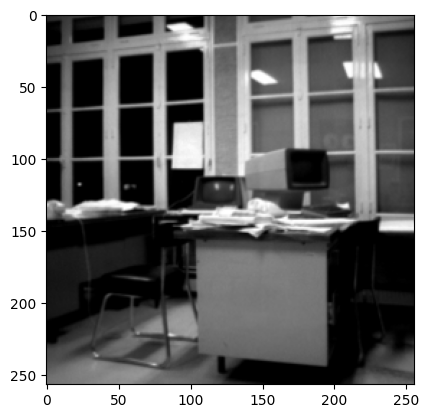

In [4]:
plt.imshow(image, cmap='gray')

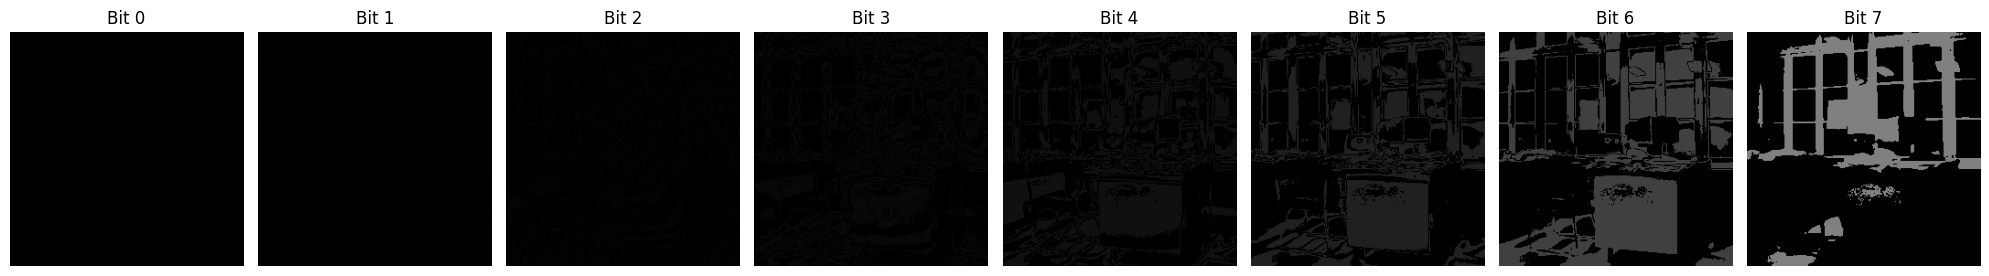

In [5]:
def bit_plane_slicing(image, k):
    plane = np.full_like(image, 2 ** k, dtype=np.uint8)
    return cv2.bitwise_and(plane, image)

fig, axes = plt.subplots(1, 8, figsize=(20, 5))  

for i in range(8):
    axes[i].imshow(bit_plane_slicing(image, i), cmap='gray')
    axes[i].set_title(f'Bit {i}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


***Identifique el plano más significativo y el menos significativo. ¿Cuál es su conclusión?***

- Teniendo en cuenta los planos de arriba, el plano más significativo es el plano 6, y el menos significativo el plano 0. Esto debido a que el plano 6 conserva mucha parte de la imagen original al punto de que es posible dislumbrar los elementos de la foto original.  El plano menos significativo es el 0 ya que es prácticamente una imagen en negro sin ninguna información de la imagen original.

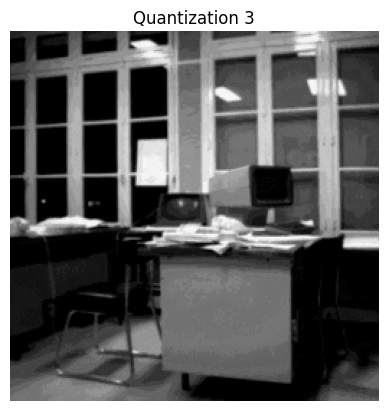

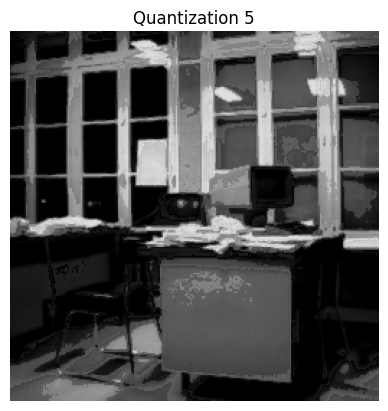

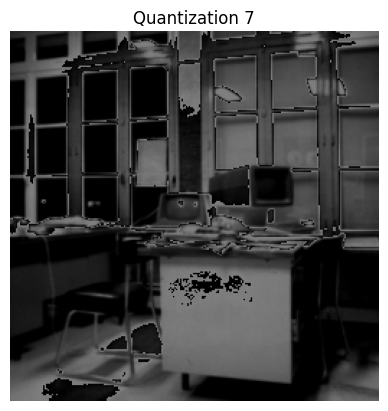

<Figure size 640x480 with 0 Axes>

In [6]:
def image_quantization(imagen, k):
    plane = np.full_like(imagen, 255-2 ** k, np.uint8)
    return cv2.bitwise_and(plane, imagen)

list = [3,5,7]

for i in list:
    plt.imshow(image_quantization(image, i), cmap='gray')
    plt.title(f'Quantization {i}')
    plt.axis('off')
    plt.show()

plt.tight_layout()
plt.show()


## Conclusiones

Como se puede apreciar, la cuantificación sobre 5 (anulación del bit 3) es en la que menos detalle se pierde. Ya que aún es posible distinguir los elementos de la foto. Sin embargo en la anulación del bit 5 ya se nota una perdida mayor de detalle. y en la anulación del bit 7 se pierde mucho la calidad. 

Cuantificación de 5 bits: Se mantiene una buena calidad de imagen, con algunas pérdidas leves en las transiciones de intensidad.

Cuantificación de 3 bits: La imagen muestra una mayor reducción en los niveles de grises, generando un efecto de posterización.

Cuantificación de 1 bit: Se convierte en una imagen binaria con solo dos niveles (negro y blanco), perdiendo completamente los detalles.